In [1]:
import pandas as pd
import numpy as np

## Reading Data For Training

In [2]:
x = pd.read_csv('Training Data/Linear_X_Train.csv')
y = pd.read_csv('Training Data/Linear_Y_Train.csv')
print(x.head())
# print(y.head())


          x
0 -0.289307
1 -0.588810
2  1.027507
3 -0.259013
4  0.782043


## Filtering data for training

In [3]:

xTrain = x.values.reshape(-1,)
yTrain = y.values.reshape(-1,)

print(xTrain.shape)
print(yTrain.shape)


(3750,)
(3750,)


## Ploting training Data

In [4]:
import matplotlib.pyplot as plt
plt.scatter(xTrain,yTrain)
plt.show()

<Figure size 640x480 with 1 Axes>

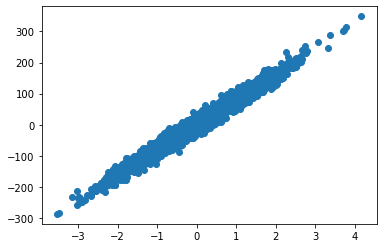

In [5]:
xTrain = (xTrain- xTrain.mean())/xTrain.std()
plt.scatter(xTrain,yTrain)
plt.show()

## Writting Algorithm for our Model

In [6]:
# Hypothesis Function For out model y = mx + c

def hypothesis(x, theta):
    return (theta[0] + theta[1] * x)

In [7]:
# Error Function

def error(x, y, theta):
    err = 0
    for i in range(x.shape[0]):
        hx = hypothesis(x[i], theta)
        err += (hx - y[i])**2
    return err

In [8]:
# Gradeint

def gradient(x, y , theta):
    grad = np.zeros((2,)) 
    for i in range(x.shape[0]):
        hx = hypothesis(x[i], theta)      # y = mx + c
        grad[0] += (hx - y[i])            # intercept(c)
        grad[1] += (hx - y[i])*x[i]       # bias (m)
    return grad

In [9]:
# Final Gradient Descent Algorithm

def gradient_Descent(x, y, learning_rate = 0.00005):
    
    theta = np.array([0.0,1.0])
    itr = 0
    max_itr = 1000
    err_list = []
    theta_list = []
    
    
    while(itr <= max_itr):
        grad = gradient(x, y , theta)
        er = error(x, y, theta)
        
        err_list.append(er)
        theta_list.append((theta[0], theta[1]))
        
        theta[0] -= learning_rate * grad[0] 
        theta[1] -= learning_rate * grad[1]
        
        itr += 1
    return theta, err_list,theta_list

In [10]:
final_theta, err_list, theta_list = gradient_Descent(xTrain,yTrain)


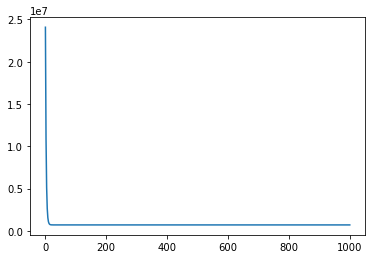

In [11]:
# print(err_list)
plt.plot(err_list)
plt.show()

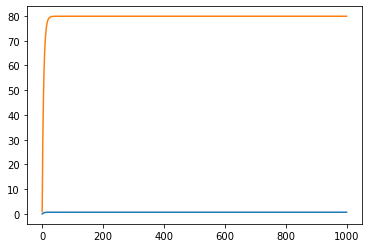

[(0.0, 1.0), (0.1282254315029233, 15.794825676718649), (0.23240859459904828, 27.81562153905261), (0.3170574146146502, 37.582518177198935), (0.3858345808773258, 45.518121695692855), (0.4417160284657498, 51.96579955446916), (0.4871197046313443, 57.20453781472491), (0.5240101915158902, 61.4610126511827), (0.5539837121095834, 64.91939845580465), (0.578337197591959, 67.72933692205999), (0.5981244045463894, 70.01241192589245), (0.6142015101968646, 71.86741036650632), (0.6272641585378753, 73.3745965995051), (0.6378775603149465, 74.5991854138166), (0.6465009492588167, 75.5941638254447), (0.6535074527757113, 76.40258378489253), (0.6592002368831883, 77.0594250019439), (0.6638256239705131, 77.59310849079812), (0.6675837509789648, 78.02672632549218), (0.670637229173332, 78.3790408161811), (0.6731181802062548, 78.66529633986586), (0.6751339529205047, 78.89787895285973), (0.676771768250833, 79.08685232591723), (0.6781024932067249, 79.24039319152646), (0.679183707233387, 79.36514514483396), (0.680062

In [13]:
plt.plot(theta_list)
plt.show()
print(theta_list)

In [14]:
xTrain.shape

(3750,)

In [15]:
print(final_theta)

[ 0.68386897 79.90573694]


In [16]:
xTest = np.linspace(-5,6,10)
xTest

array([-5.        , -3.77777778, -2.55555556, -1.33333333, -0.11111111,
        1.11111111,  2.33333333,  3.55555556,  4.77777778,  6.        ])

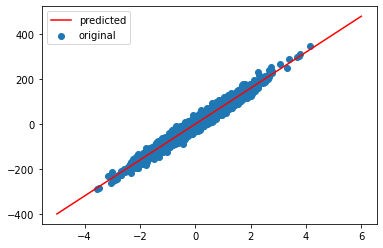

In [21]:
plt.scatter(xTrain,yTrain,label='original')
plt.plot(xTest,hypothesis(xTest,final_theta),color='red',label='predicted')
plt.legend()
plt.show()

## Testing the Model

In [24]:
testData = pd.read_csv('Testing Data/Linear_X_Test.csv')
testData.head()

,x
0,-1.877944
1,-0.869032
2,-2.530182
3,2.760205
4,0.591000


In [28]:
finalTest = testData.values.reshape(-1,)

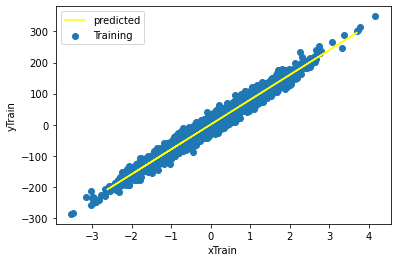

In [31]:
plt.scatter(xTrain,yTrain,label='Training')
plt.plot(finalTest,hypothesis(finalTest,final_theta),color='yellow',label='predicted')
plt.xlabel('xTrain')
plt.ylabel('yTrain')
plt.legend()
plt.show()